In [13]:
from ssfp import bssfp
from gasp.phantom import block_phantom
from gasp.simulation import simulate_ssfp
from gasp.ssfp import ssfp as gasp_ssfp
import numpy as np
import matplotlib.pyplot as plt

In [14]:
M, N = 256, 256
T1, T2 = 0.25, 0.07
alpha = np.deg2rad(100)
im = block_phantom(shape=N, padding=0)
T1s = im*T1
T1s = im*T2
TRs = (5e-3, 10e-3, 20e-3)
nTRs = len(TRs)
nPCs = 8
PCs = np.linspace(0, 2*np.pi, nPCs, endpoint=False)

BetaMax = 2 * np.pi
beta = np.linspace(-BetaMax, BetaMax, N)
f = beta / TRs[0] / (2 * np.pi)
f = np.tile(f, (M, 1))

#sim = np.empty((M, N, nPCs,  nTRs), dtype=np.complex128)
#for ii, TR in enumerate(TRs):
#    for jj, PC in enumerate(PCs):
#        sim[..., jj, ii] = bssfp(T1=T1s, T2=T1s, TR=TR, alpha=alpha, field_map=f, phase_cyc=PC)
sim = simulate_ssfp(alpha = alpha, gradient = BetaMax, phantom_type="block").squeeze()
print(sim.shape)

(256, 256, 16, 3)


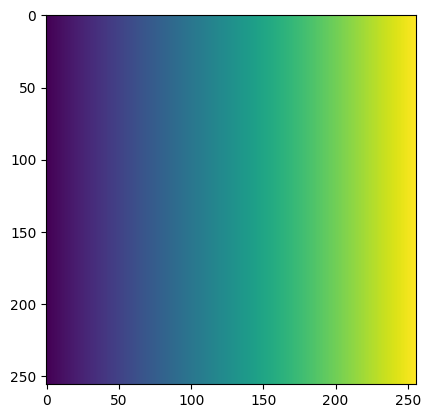

In [15]:
plt.imshow(f)

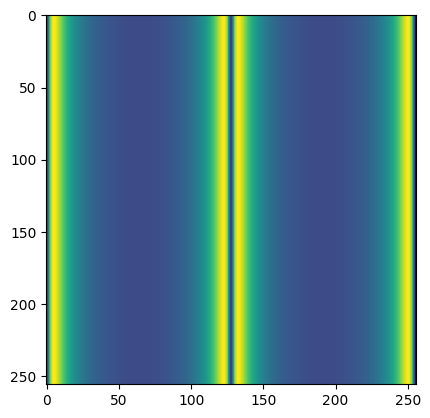

In [16]:
plt.imshow(np.abs(sim[..., 0, 0]))

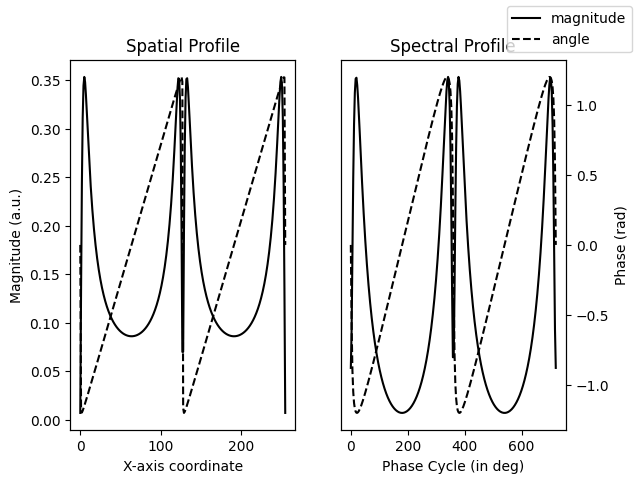

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(np.abs(sim[M//2, :, 0, 0]), "k-")
ax1.set_ylabel('Magnitude (a.u.)')
ax1.set_xlabel('X-axis coordinate')
ax1.set_title("Spatial Profile")
ax1phase = ax1.twinx()
phase_correction = np.linspace(-BetaMax, BetaMax, N)/2  # why is this extra factor of 2 here?
ax1phase.plot(np.angle(sim[M//2, :, 0, 0]) + phase_correction, "k--")
ax1phase.set_yticks([])

theoretic_pcs = np.linspace(0, 4*np.pi, N)
theoretical_profile = gasp_ssfp(T1, T2, TRs[0], TRs[0]/2.0, alpha, theoretic_pcs, field_map=0)
ax2.set_xlabel('Phase Cycle (in deg)')
ax2.plot(np.rad2deg(theoretic_pcs), np.abs(theoretical_profile), "k-", label="magnitude")
ax2.set_title("Spectral Profile")
ax2.set_yticks([])
ax2phase = ax2.twinx()
ax2phase.plot(np.rad2deg(theoretic_pcs), np.angle(theoretical_profile), "k--", label="angle")
ax2phase.set_ylabel('Phase (rad)')

fig.legend()


In [18]:
# Actual spectral profile appears to have smooth phase transitions while spatial has sharp transitions

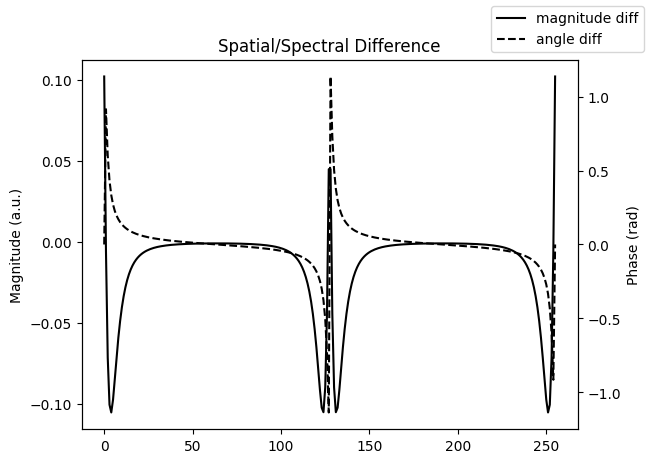

In [19]:
fig, ax = plt.subplots()
ax.plot(np.abs(theoretical_profile) - np.abs(sim[M//2, :, 0, 0]), "k-", label="magnitude diff")
ax.set_ylabel('Magnitude (a.u.)')
ax.set_title("Spatial/Spectral Difference")
axphase = ax.twinx()
axphase.plot(np.angle(theoretical_profile) - (np.angle(sim[M//2, :, 0, 0]) + phase_correction), "k--", label="angle diff")
axphase.set_ylabel('Phase (rad)')

fig.legend()